# Отчет по ОММ 
# Вариант 6
## Репченко Александр, 342 группа

# 1. Постановка задачи
Используя схему бегущего счета и итерационные методы, решить задачу:

\begin{equation*}
 \begin{cases}
   \begin{aligned}
&\frac{\partial u}{\partial t}-(2 u+t) \frac{\partial u}{\partial x} =0, \quad-1 \leq x<0 \\
& u(x, 0) =1-x \\
& u(0, t) =\frac{2-t^{2}}{4 t+2}
\end{aligned}
 \end{cases}
\end{equation*}

# 2. Анализ задачи
## 2.1 Построение характеристик
Уравнения характеристик выглядит следующим образом:

$$\dfrac{dt}{1}=\dfrac{dx}{-(2u+t)}=\dfrac{du}{0}$$

Тогда:

$$\int\limits_{x_0}^x \,dx=-\int\limits_{t_0}^t (2u+t)\,dt$$

\begin{equation*}
\begin{cases}
   \begin{aligned}
&x-x_0=-2u(t-t_0)-\frac{(t-t_0)^2}{2} \\
&u=const \\
\end{aligned}
 \end{cases}
 \end{equation*}
Подставим начальные и граничные условия:

1) $t_0=0$: $x-x_0=-2t(1-x_0)-\dfrac{t^2}{2}$

2) $x_0=0$: $x=-2(t-t_0)\dfrac{2-t^2_0}{4t_0+2}-\dfrac{(t-t_0)^2}{2}$

Выражая $t$ через $x, x_0, t_0$, можно получить на промежутке $[-1,0]$ семейство характеристик, варируя $x_0, y_0$.
Таким образом семейство характеристик выглядит так:

<IPython.core.display.Javascript object>


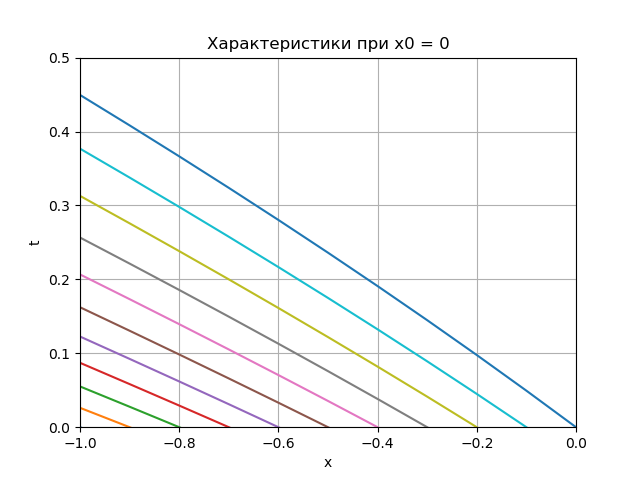

<IPython.core.display.Javascript object>


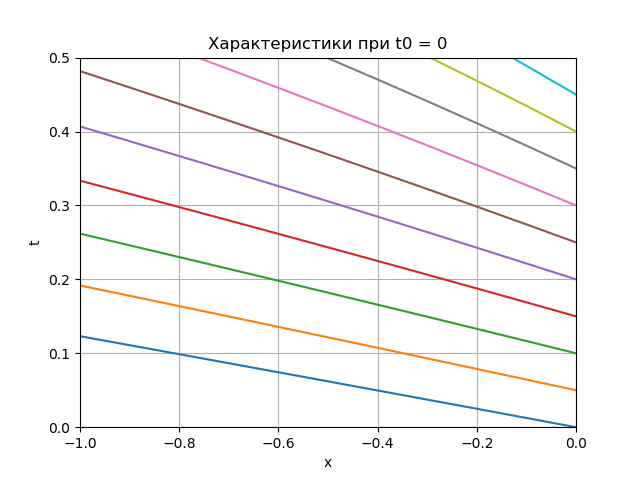

In [179]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def root1(x):
    return [2*(-(1-x0) + ((1-x0)**2 - (x-x0) / 2.) ** 0.5) for x0 in np.arange(-1., 0.1, 0.1)]

def root2(x):
    return [t0 - (2-t0)**2/(2.*t0+1) + (((2-t0)**2/(2.*t0+1) - t0)**2-
                   (t0**2-2.*(2-t0)**2*t0/(2*t0+1)+x))**0.5 for t0 in np.arange(0, 1.1, 0.05)]

x_arr = np.arange(-1, 0.1, 0.1)

arr1 = [root1(x) for x in x_arr]
arr2 = [root2(x) for x in x_arr]

def show_lines(x_arr, root_arr, name):
    fig = plt.figure()
    plt.ylim(0,0.5)
    plt.xlim(-1,0)
    plt.plot(x_arr, root_arr) 
    plt.title('Характеристики при ' + name + ' = 0')
    plt.ylabel('t')
    plt.xlabel('x')
    plt.grid(True)
    plt.show
    
    
show_lines(x_arr, arr1, 'x0')
show_lines(x_arr, arr2, 't0')

Заметим, что на интервале $x \in\left[-1,0\right)$ в промежутке времени $t \in \left[0, 1\right]$ характеристики не пересекаются, а значит в данном прямоугольнике решение однозначное, вот в нем и будем искать численное решение.

## 2.2 Аналитическое решение

Найдем же решение аналитически методом характеристик.

Как нам известно:

\begin{equation*}
 \begin{cases}
   \begin{aligned}
&u=C_1 \\
&2ut+\frac{t^2}{2}+x=C_2 \\
\end{aligned}
\end{cases}
\end{equation*}

При $t=0$:
\begin{equation*}
 \begin{cases}
   \begin{aligned}
&u=1-x=C_1 \\
&x=C_2 \\
\end{aligned}
\end{cases}
\end{equation*}

Следовательно $C_2=1-C_1=1-u$

При $x=0$:
\begin{equation*}
 \begin{cases}
   \begin{aligned}
&u=\dfrac{2-t^2}{4t+2}=C_1 \\
&2ut+\frac{t^2}{2}=C_2 \\
\end{aligned}
\end{cases}
\end{equation*}

Заметим, что решение будет при $2ut+\frac{t^2}{2}+x=C_2=1-C_1=1-u$.

Тогда, выражая $u$, получаем аналитическое решение:

$$u(x,t) = \dfrac{2-t^2-2x}{4t+2}, x\in\left[-1,0\right), t\in\left[0,1\right]$$

Выглядит график данного решения следующим образом:


<IPython.core.display.Javascript object>


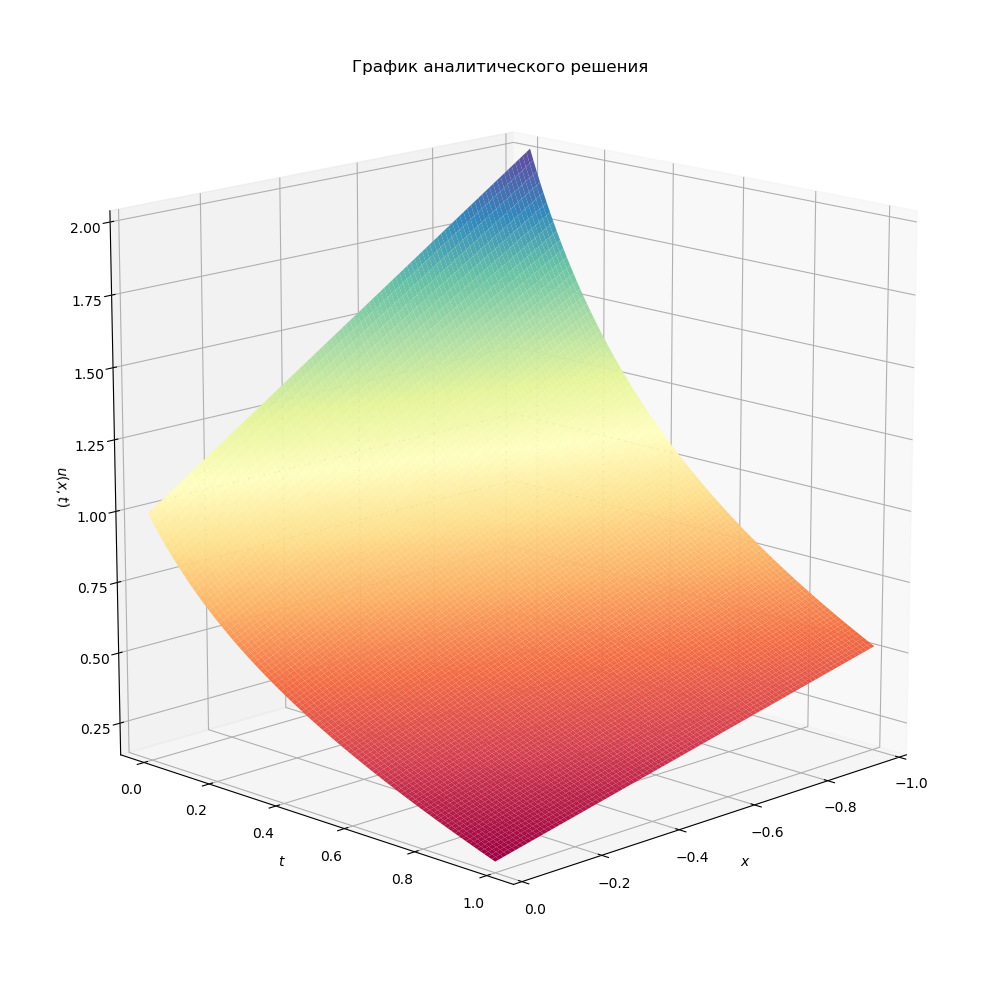

In [91]:
x0, x1 = -1, 0
t0, t1 = 0, 1
N, M = 100, 100

def get_U(x,t):
    return (2-t**2-2*x)/(4.*t+2)

def analitic_solution(x0, x1, t0, t1, N, M):
    u = np.zeros((M, N))

    for m in range(0, M):
            for n in range(0, N):
                u[m][n] = get_U(x0 + (x1-x0) * n / N, t0 + (t1-t0) *m / M)

    return u

def draw_graph(x0, x1, t0, t1, N, M, U, name):
    x = np.linspace(x0, x1, N) 
    t = np.linspace(t0, t1, M) 
    x, t = np.meshgrid(x, t)

    
    fig = plt.figure(figsize=(10, 10))
    axes = Axes3D(fig)
    plt.title(name)
    axes.set(xlabel=r'$x$', ylabel=r'$t$', zlabel=r'$u(x,t)$', xlim=[-1, 0])
    axes.plot_surface(x, t, U, rstride=1, cstride=1, cmap='Spectral')
    axes.view_init(15, 45)
    
    plt.show()
    
u_analitic = analitic_solution(x0, x1, t0, t1, N, M)
draw_graph(x0, x1, t0, t1, N, M, u_analitic, 'График аналитического решения')


# 3. Численное решение

## 3.1 Сетка

Введем сетку $\Omega=\{(x, t): -1\leq x < 0,0<t<1\}$ с шагом $h$ по $x$ и шагом $\tau$ по $y$:

$$\omega_{h, \tau}=\left\{\begin{array}{ll}
x_{n}=n \cdot h, & h=\frac{1}{N}, \quad n=\overline{0, N} \\
t_{m}=m \cdot \tau, & \tau=\frac{1}{M}, \quad m=\overline{0, M}
\end{array}\right.$$

Будем рассматривать на данной сетке сеточную функцию $u_{n,m} = u(x_n, t_m)$

## 3.2 Шаблон

Приведем наше уравнение к дивергентному виду:

$$ \dfrac{\partial u}{\partial t} - \dfrac{\partial (u^2+xt)}{\partial x}=0 $$

Воспользуемся четырехточеным шаблоном, ведь он $\textbf{безусловно устойчив}$ и аппроксимирует решение как $O(h^2+\tau^2)$.

Тогда разностная схема примет вид:

\begin{equation*}
 \begin{cases}
   \begin{aligned}
& \dfrac{\left(u^{m+1}_n-u^m_n+u^{m+1}_{n+1}-u^m_{n+1}\right)}{2\tau}-\dfrac{\left(u^{m+1}_{n+1})^2+x_{n+1}t^{m+1}-(u^{m+1}_{n})^2-x_{n}t^{m+1}+(u^{m}_{n+1})^2+x_{n+1}t^{m}-(u^{m}_{n})^2-x_{n}t^{m}\right)}{2h}=0\\
& u^0_n =1-x_n\\
& u^m_0 =\frac{2-(t^{m})^2}{4 t^m+2}
\end{aligned}
 \end{cases}
\end{equation*}

Здесь принятые обозначения:  $x_n = nh, n=\overline{0, N}$, и $t^m=m\tau, m=\overline{0, M}$.

Заметим, что $x_{n+1}t^{m+1}-x_{n}t^{m+1}+x_{n+1}t^{m}-x_{n}t^{m}=h\tau$.

Тогда разностная схема примет вид:

\begin{equation*}
 \begin{cases}
   \begin{aligned}
& \dfrac{\left(u^{m+1}_n-u^m_n+u^{m+1}_{n+1}-u^m_{n+1}\right)}{2\tau}-\dfrac{(u^{m+1}_{n+1})^2-(u^{m+1}_{n})^2+(u^{m}_{n+1})^2-(u^{m}_{n})^2+h\tau}{2h}=0\\
& u^0_n =1-nh\\
& u^m_0 =\frac{2-(m\tau)^2}{4 m\tau+2}
\end{aligned}
 \end{cases}
\end{equation*}

Данная система уравнений является неявным уравнением относительно $u^{m+1}_{n+1}$:

$$f(u^{m+1}_{n+1})=\dfrac{u^{m+1}_{n+1}}{2\tau}-\dfrac{(u^{m+1}_{n+1})^2}{2h}+A-B, \text{где}$$ 

$$A=\dfrac{u^{m+1}_{n}-u^{m}_{n}-u^{m}_{n+1}}{2\tau}, B=\dfrac{-(u^{m+1}_{n})^2+(u^{m}_{n+1})^2-(u^{m}_{n})^2+h\tau}{2h}$$.

Будем решать данное уравнение итерационным методом Ньютона.

Пусть $u^k$ -- начальное приближение, тогда переход из $k$ в $k+1$ происходит следующим образом:

$u^{k+1}=u^{k}+\Delta u^{k} \cdot f\left(u^{k}\right)$, где $\Delta u^k$ определяется из разложения в ряд Тейлора функции

$$0 \approx f\left(u^{k}+\Delta u^{k}\right)=f\left(u^{k}\right)+\Delta u^{k} f\left(u^{k}\right)+\ldots$$

Тогда $\Delta u^{k}=-\frac{f\left(u^{k}\right)}{f^{\prime}\left(u^{k}\right)}$, причем 

$$f^{\prime}\left(u^{k}\right)=\dfrac{1}{2\tau}-\dfrac{u^{k}}{h}$$

Остановим итерацию при достижении $|\Delta u^{k}| < \epsilon$, где $\epsilon$ -- заданная пользователем погрешность.

<IPython.core.display.Javascript object>


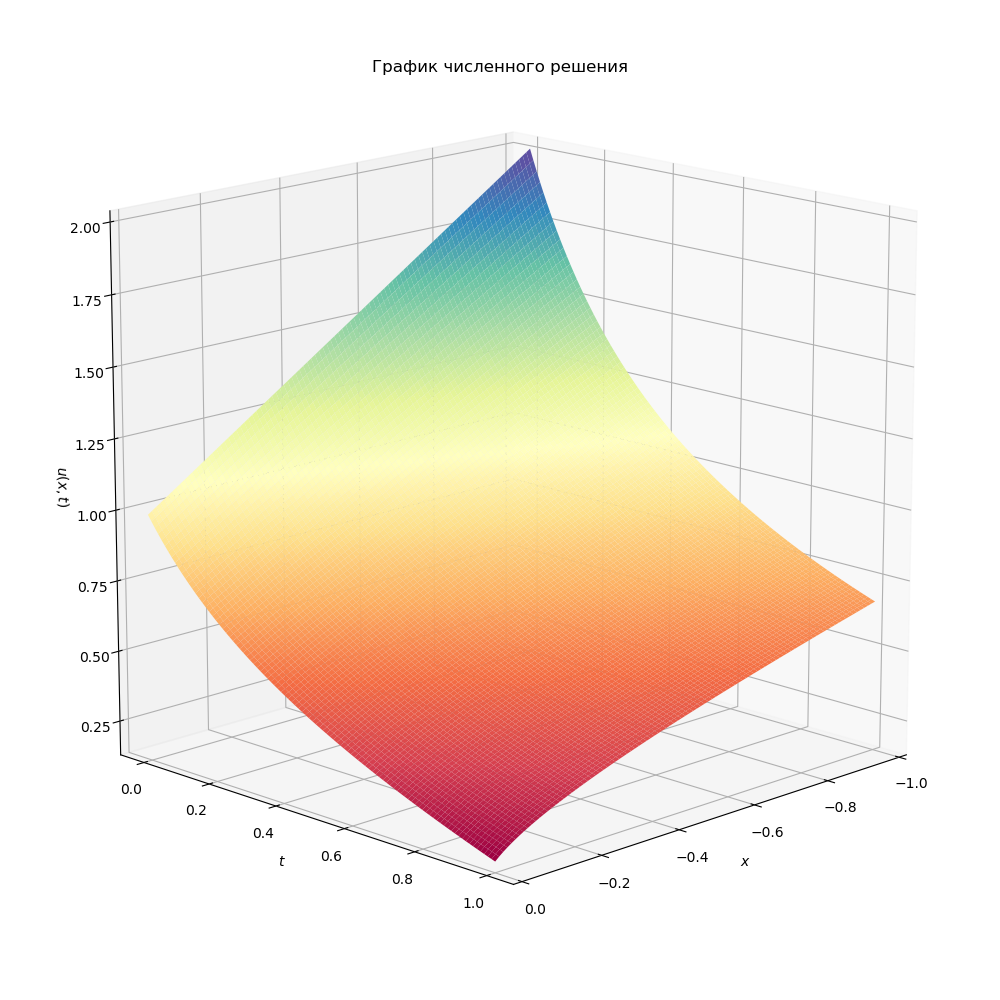

0.7433872294760187


In [119]:
ε = 0.001 
t0, t1 = 0., 1 
x0, x1 = 0., -1
N, M = 100, 100

def numerical_solution(x0, x1, t0, t1, N, M):     
    def F(m, n):
        return u[m][n]**2

    def f(mp1, np1):
        n = np1-1
        m = mp1-1
        return (u[mp1][n]-u[m][n]+u[mp1][np1]-u[m][np1])/(2.*τ)-(F(mp1, np1)-F(mp1,n)+F(m, np1)-F(m,n)+h*τ)/(2.*h)
    
    def df(m, n):
        return (1/(2*τ)-u[m][n]/h)
    
    h = (x1-x0) / (N-1)
    τ = (t1-t0) / (M-1)
    u = np.zeros((M, N))
    
    for n in np.arange(N):
        u[0][n] = 1- h*n
    for m in np.arange(M):
        u[m][0] = (2-(τ*m)**2)/(4*τ*m+2)
        
    for m in np.arange(M)[0:M - 1]:
        for n in np.arange(N)[0:N - 1]:
            eps = 1 + ε;
            while eps > ε:
                ep = f(m + 1, n + 1) / df(m + 1, n + 1)
                u[m + 1][n + 1] = u[m + 1][n + 1] - ep
                eps = abs(ep)
    
    return u

u = numerical_solution(x0, x1, t0, t1, N, M)             
draw_graph(x0, x1, t0, t1, N, M, u, 'График численного решения')

print(u[50, 50])

# 4 Погрешность измерений

Рассмотрим значение фунции $u(x,t)$ в точке $(-0.5, 0.5)$ и сравним его с значениями численного решения в зависимости от количества узлов $N$ по $x$ и $M$ по $t$.

Аналитическое решение дает нам точное значение функции:

$u(-0.5, 0.5) = 0.6875$

In [169]:
N_min, N_max = 10, 150
M_min, M_max = 10, 150
step = int(10)
a = 0.6875

matrix = np.zeros((int((N_max-N_min+step) / step), int((M_max-M_min+step) / step)))
               
for n in np.arange(N_min, N_max + step, step):
    for m in np.arange(M_min, M_max + step, step):
        u = numerical_solution(x0, x1, t0, t1, n, m)
        matrix[int(n/step)-1, int(m/step)-1] = (abs(u[int(m/2), int(n/2)] - a)/a)*100

<IPython.core.display.Javascript object>


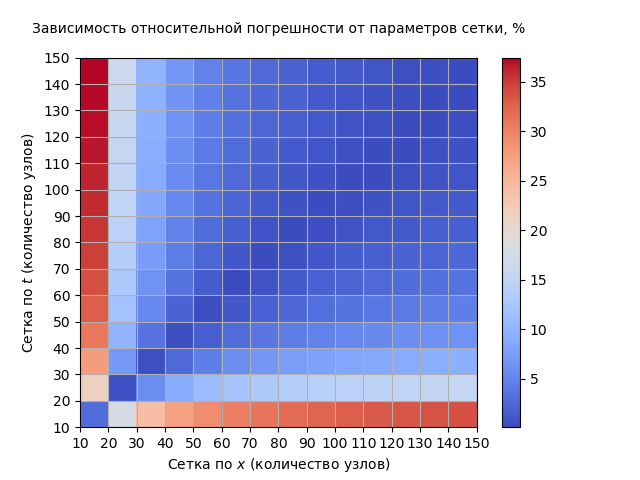

In [181]:
N1 = range(N_min, N_max + step, step)
M1 = range(M_min, M_max + step, step)

N1, M1 = np.meshgrid(N1, M1)

fig = plt.figure()
plt.pcolormesh(M1, N1, matrix, cmap='coolwarm')
plt.xlabel('Сетка по $x$ (количество узлов)')
plt.ylabel('Сетка по $t$ (количество узлов)')
plt.title('Зависимость относительной погрешности от параметров сетки, %\n', size=10)
plt.xticks(range(N_min, N_max + step,10))
plt.yticks(range(M_min, M_max + step,10))
plt.colorbar()
plt.grid()


Как можно заметить, погрешность уменьшается с увеличением сетки, лучший же результат продемонстрирован при равномерной одинаковой сетке.